In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# File to Load (Remember to Change These)
mouse_drug_data_file = "mouse_drug_data.csv"
clinical_trial_data_file = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data_file)
mouse_drug_data.head(2)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn


In [2]:
clinical_trial_data = pd.read_csv(clinical_trial_data_file)
clinical_trial_data.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [3]:
# Combine the data into a single dataset

Drugtest_Data = pd.merge(clinical_trial_data,mouse_drug_data,on = 'Mouse ID', how = 'left')
Drugtest_Data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [4]:
#Tumor Response to Treatment
mean_drugtest_df = Drugtest_Data.groupby(['Drug', 'Timepoint'], as_index = False).mean()
mean_drugtest_df.head(2)

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.00
1,Capomulin,5,44.266086,0.16


In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumorVol_df = mean_drugtest_df[['Drug','Timepoint','Tumor Volume (mm3)']]

#mean_tumorVol_df = pd.DataFrame(test_Data.groupby(['Drug', 'Timepoint'])[['Tumor Volume (mm3)']].mean())
mean_tumorVol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumorVol_pivot = mean_tumorVol_df.pivot_table(index='Timepoint',columns='Drug' , values='Tumor Volume (mm3)', fill_value=0)

# Preview that Reformatting worked
mean_tumorVol_pivot.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818


In [7]:
# Selected drugs
mean_tumorVol_pivotSummary = mean_tumorVol_pivot[['Capomulin','Ketapril','Placebo','Infubinol']]
# Preview that Reformatting worked
mean_tumorVol_pivotSummary.head()

Drug,Capomulin,Ketapril,Placebo,Infubinol
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.389175,47.125589,47.062001
10,43.084291,49.582269,49.423329,49.403909
15,42.064317,52.399974,51.359742,51.296397
20,40.716325,54.920935,54.364417,53.197691


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderr_tumorVol_df = Drugtest_Data.groupby(['Drug','Timepoint']).sem()[['Tumor Volume (mm3)']]
stderr_tumorVol_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [9]:
# Minor Data Munging to Re-Format the Data Frames
stderr_tumorVol_pivot = stderr_tumorVol_df.pivot_table(index='Timepoint',columns='Drug' , values='Tumor Volume (mm3)', fill_value=0)
# Preview that Reformatting worked
stderr_tumorVol_pivot.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.18895


In [10]:
stderr_tumorVol_pivotSummary = stderr_tumorVol_pivot[['Capomulin','Ketapril','Placebo','Infubinol']]
stderr_tumorVol_pivotSummary.head(2)

Drug,Capomulin,Ketapril,Placebo,Infubinol
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.264819,0.218091,0.235102


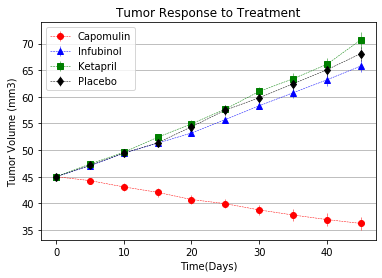

In [11]:
plt.errorbar(mean_tumorVol_pivotSummary.index, mean_tumorVol_pivotSummary['Capomulin'], yerr=stderr_tumorVol_pivotSummary['Capomulin'],
             color='red',marker='o', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='red')
plt.errorbar(mean_tumorVol_pivotSummary.index, mean_tumorVol_pivotSummary['Infubinol'], yerr=stderr_tumorVol_pivotSummary['Infubinol'],
             color='blue',marker='^', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='blue')
plt.errorbar(mean_tumorVol_pivotSummary.index, mean_tumorVol_pivotSummary['Ketapril'], yerr=stderr_tumorVol_pivotSummary['Ketapril'],
             color='green',marker='s', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='green')
plt.errorbar(mean_tumorVol_pivotSummary.index, mean_tumorVol_pivotSummary['Placebo'], yerr=stderr_tumorVol_pivotSummary['Placebo'],
             color='black',marker='d', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='black')

# Show y-axis in 'plain' format instead of 'scientific'
#plt.ticklabel_formatel_format(style='scientific', axis='y')

plt.title('Tumor Response to Treatment')
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo' ],
           loc='best')
#plt.tight_layout()
plt.grid(axis = "y")

# Save file
plt.savefig('TumorResponseTreatment.png')

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_MetSite_df = mean_drugtest_df[['Drug','Timepoint','Metastatic Sites']]
# Preview DataFrame
mean_MetSite_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mean_MetSite_Pivot = mean_MetSite_df.pivot_table(index='Timepoint',columns='Drug' , values='Metastatic Sites', fill_value=0)

# Preview that Reformatting worked
mean_MetSite_Pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [14]:
# Selected drugs
mean_MetSite_PivotSummary = mean_MetSite_Pivot[['Capomulin','Ketapril','Placebo','Infubinol']]
# Preview that Reformatting worked
mean_MetSite_PivotSummary.head()

Drug,Capomulin,Ketapril,Placebo,Infubinol
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.304348,0.375000,0.280000
10,0.320000,0.590909,0.833333,0.666667
15,0.375000,0.842105,1.250000,0.904762
20,0.652174,1.210526,1.526316,1.050000


In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
stderr_MetSite_df = pd.DataFrame(Drugtest_Data.groupby(['Drug','Timepoint']).sem()[['Metastatic Sites']])
stderr_MetSite_df.reset_index()
# Preview DataFrame
stderr_MetSite_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [16]:
# Minor Data Munging to Re-Format the Data Frames
stderr_MetSite_Pivot = stderr_MetSite_df.pivot_table(index='Timepoint',columns='Drug' , values='Metastatic Sites', fill_value=0)

# Preview that Reformatting worked
stderr_MetSite_Pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [17]:
# Selected drugs
stderr_MetSite_PivotSummary = stderr_MetSite_Pivot[['Capomulin','Ketapril','Placebo','Infubinol']]
# Preview that Reformatting worked
stderr_MetSite_PivotSummary.head()

Drug,Capomulin,Ketapril,Placebo,Infubinol
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.098100,0.100947,0.091652
10,0.125433,0.142018,0.115261,0.159364
15,0.132048,0.191381,0.190221,0.194015
20,0.161621,0.236680,0.234064,0.234801


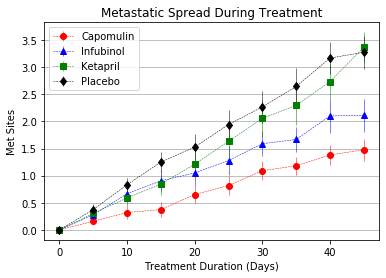

In [18]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_MetSite_PivotSummary.index, mean_MetSite_PivotSummary['Capomulin'], yerr=stderr_MetSite_PivotSummary['Capomulin'],
             color='red',marker='o', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='red')
plt.errorbar(mean_MetSite_PivotSummary.index, mean_MetSite_PivotSummary['Infubinol'], yerr=stderr_MetSite_PivotSummary['Infubinol'],
             color='blue',marker='^', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='blue')
plt.errorbar(mean_MetSite_PivotSummary.index, mean_MetSite_PivotSummary['Ketapril'], yerr=stderr_MetSite_PivotSummary['Ketapril'],
             color='green',marker='s', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='green')
plt.errorbar(mean_MetSite_PivotSummary.index, mean_MetSite_PivotSummary['Placebo'], yerr=stderr_MetSite_PivotSummary['Placebo'],
             color='black',marker='d', linestyle='dashed',elinewidth=.5,  linewidth=.5, ecolor='black')

# Show y-axis in 'plain' format instead of 'scientific'
#plt.ticklabel_formatel_format(style='scientific', axis='y')

plt.title('Metastatic Spread During Treatment')
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo' ], loc='best')
#plt.tight_layout()
plt.grid(axis = "y")

# Save the Figure
plt.savefig('MetSpread.png')

In [19]:
# Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mousecount_df = Drugtest_Data.groupby(['Drug', 'Timepoint']).size().reset_index(name = 'Mouse Count')

# Convert to DataFrame
# Preview DataFrame
mousecount_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
# Minor Data Munging to Re-Format the Data Frames
mousecount_Pivot = mousecount_df.pivot_table(index='Timepoint',columns='Drug' , values='Mouse Count', fill_value=0)
# Preview the Data Frame
mousecount_Pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [22]:
# Selected drugs
mousecount_PivotSummary = mousecount_Pivot[['Capomulin','Ketapril','Placebo','Infubinol']]
# Preview that Reformatting worked
mousecount_PivotSummary.head()

Drug,Capomulin,Ketapril,Placebo,Infubinol
Timepoint,,,,
0,25,25,25,25
5,25,23,24,25
10,25,22,24,21
15,24,19,20,21
20,23,19,19,20


In [23]:
# Calculate % and store in new columns

mousecount_PivotSummary['Capomulin_Perc'] = mousecount_PivotSummary['Capomulin']/mousecount_PivotSummary['Capomulin'][0]*100
mousecount_PivotSummary['Infubinol_Perc'] = mousecount_PivotSummary['Infubinol']/mousecount_PivotSummary['Infubinol'][0]*100
mousecount_PivotSummary['Ketapril_Perc'] = mousecount_PivotSummary['Ketapril']/mousecount_PivotSummary['Ketapril'][0]*100
mousecount_PivotSummary['Placebo_Perc'] = mousecount_PivotSummary['Placebo']/mousecount_PivotSummary['Placebo'][0]*100
#mousecount_PivotSummary.apply(lambda x: x/25*100)
mousecount_PivotSummary

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

Drug,Capomulin,Ketapril,Placebo,Infubinol,Capomulin_Perc,Infubinol_Perc,Ketapril_Perc,Placebo_Perc
Timepoint,,,,,,,,
0,25,25,25,25,100.0,100.0,100.0,100.0
5,25,23,24,25,100.0,100.0,92.0,96.0
10,25,22,24,21,100.0,84.0,88.0,96.0
15,24,19,20,21,96.0,84.0,76.0,80.0
20,23,19,19,20,92.0,80.0,76.0,76.0
25,22,19,17,18,88.0,72.0,76.0,68.0
30,22,18,15,17,88.0,68.0,72.0,60.0
35,22,17,14,12,88.0,48.0,68.0,56.0
40,21,15,12,10,84.0,40.0,60.0,48.0


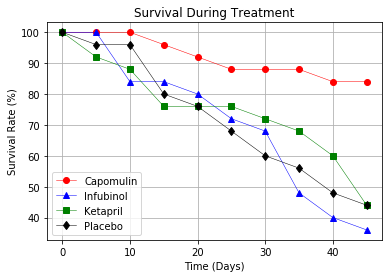

In [24]:
plt.plot(mousecount_PivotSummary.index, mousecount_PivotSummary["Capomulin_Perc"],
                     color='red',marker= 'o', linewidth=0.5, label="Capomulin")

plt.plot(mousecount_PivotSummary.index, mousecount_PivotSummary["Infubinol_Perc"],
                     color='blue',marker= '^', linewidth=0.5, label="Infubinol")

plt.plot(mousecount_PivotSummary.index, mousecount_PivotSummary["Ketapril_Perc"],
                     color='green',marker= 's', linewidth=0.5, label="Ketapril")

plt.plot(mousecount_PivotSummary.index, mousecount_PivotSummary["Placebo_Perc"],
                     color='black',marker= 'd', linewidth=0.5, label="Placebo")

plt.title('Survival During Treatment')
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo' ], loc='best')
#plt.tight_layout()
plt.grid(axis = "x")
plt.grid(axis = "y")

# Save the Figure
plt.savefig('Survival.png')

In [25]:
# Summary Bar Graph

In [26]:
# Calculate the percent changes for each drug
Drugtest_Data.head()
# Minor Data Munging to Re-Format the Data Frames
perc_chage_pivot = Drugtest_Data.pivot_table(index='Timepoint',columns='Drug' , values='Tumor Volume (mm3)', fill_value=0)
perc_chage_pivotSummary = perc_chage_pivot[['Capomulin','Ketapril','Placebo','Infubinol']]
# Preview that Reformatting worked
perc_chage_pivotSummary
# Display the data to confirm

Drug,Capomulin,Ketapril,Placebo,Infubinol
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.389175,47.125589,47.062001
10,43.084291,49.582269,49.423329,49.403909
15,42.064317,52.399974,51.359742,51.296397
20,40.716325,54.920935,54.364417,53.197691
25,39.939528,57.678982,57.482574,55.715252
30,38.769339,60.994507,59.809063,58.299397
35,37.816839,63.371686,62.420615,60.742461
40,36.958001,66.068580,65.052675,63.162824


In [27]:
perc_change = round((perc_chage_pivotSummary.iloc[-1]-perc_chage_pivotSummary.iloc[0])/45*100)
perc_change

Drug
Capomulin   -19.0
Ketapril     57.0
Placebo      51.0
Infubinol    46.0
dtype: float64

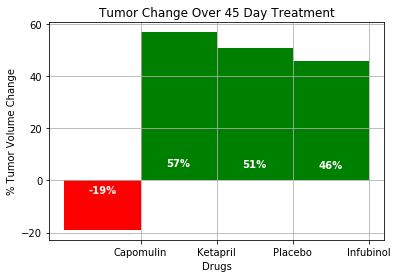

In [47]:
# Store the values in a tuple
perc_change_t = tuple(perc_change)

# Create a bar chart based upon the above data
drugs = perc_change.index
x_axis = np.arange(len(perc_change))

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)
plt.yticks([-20,0,20,40,60])

plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")

plt.grid(axis = "x")
plt.grid(axis = "y")
plt.grid(True, which='major')

barplot = plt.bar(x_axis, perc_change, align="edge", color=np.where(perc_change>0, 'g', 'r'), width=-1)

for bar in barplot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., .25*height if height<0 else .1*height,
                '%d%%' % int(height), ha='center',color = 'white',fontsize=10,fontweight=600)
    
# Save the Figure
plt.savefig('Summary_TumorChange.png')


# Set the limits of the x axis
#plt.xlim(-.5, len(x_axis)-0.5)


In [ ]:
# Observations from this data analysis;
# 1. This analysis is regarding the drug test on 25 mice for 4 given drugs
#   Capomulin, Ketapril, Placebo, Infubinol
# 2. Out of given drugs, 'Capomulin' seems to have worked best with the tests - 84% survival and 19% reduction in Tumor Volume
# 3. 